# HW 1 - DSCI ML

### Name : Anushka Kamath
### Github Username : anushkakamath
### USC email id : arkamath@usc.edu
### USC ID : 9418501008

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import math
import matplotlib.pyplot as plt
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, f1_score, classification_report

# 1. (a) Download the Vertebral Column Data Set

In [2]:
columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'label']

data = pd.read_csv('../data/vertebral_column_data/column_2C.dat', sep=' ', names = columns, header = None)
data


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [3]:
data['label'] = data['label'].replace('AB',1)
data['label'] = data['label'].replace('NO',0)
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


# 1. (b) Pre-Processing and Exploratory data analysis:
i. Scatter plots and colors to show class 0 and 1

https://seaborn.pydata.org/generated/seaborn.pairplot.html


https://www.geeksforgeeks.org/python-seaborn-pairplot-method/

In [1]:
seaborn.pairplot(data, hue ='label', markers=["o", "s"], palette='hls')
plt.legend
plt.show()

NameError: name 'seaborn' is not defined

# 1. (b) 
ii. Box plots and colors to show class 0 and 1

https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

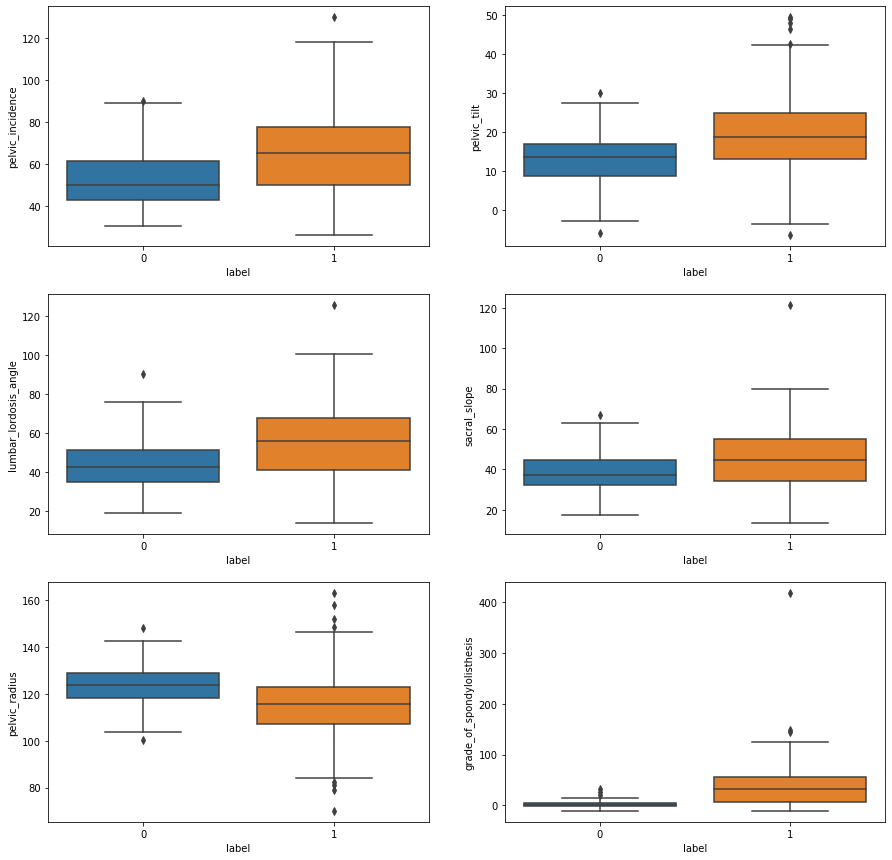

In [5]:
fig, axes = plt.subplots(3, 2, figsize = (15,15))
seaborn.boxplot(ax=axes[0, 0], x="label", y="pelvic_incidence", data = data)
seaborn.boxplot(ax=axes[0, 1], x="label", y="pelvic_tilt", data = data)
seaborn.boxplot(ax=axes[1, 0], x="label", y="lumbar_lordosis_angle", data = data)
seaborn.boxplot(ax=axes[1, 1], x="label", y="sacral_slope", data = data)
seaborn.boxplot(ax=axes[2, 0], x="label", y="pelvic_radius", data = data)
seaborn.boxplot(ax=axes[2, 1], x="label", y="grade_of_spondylolisthesis", data = data)
plt.show()

# 1. (b) 
iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

https://datascienceparichay.com/article/pandas-select-first-n-rows-dataframe/

In [6]:
train_frame = [data[data["label"] == 0].iloc[0:70, :],data[data["label"] == 1].iloc[0:140, :]]
train = pd.concat(train_frame, ignore_index = True)
test_frame = [data[data["label"] == 0].iloc[70:, :], data[data["label"] == 1].iloc[140:, :]]
test = pd.concat(test_frame, ignore_index = True)

In [7]:
train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09,1
206,88.02,39.84,81.77,48.18,116.60,56.77,1
207,83.40,34.31,78.42,49.09,110.47,49.67,1
208,72.05,24.70,79.87,47.35,107.17,56.43,1


In [8]:
test

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,50.09,13.43,34.46,36.66,119.13,3.09,0
1,64.26,14.50,43.90,49.76,115.39,5.95,0
2,53.68,13.45,41.58,40.24,113.91,2.74,0
3,49.00,13.11,51.87,35.88,126.40,0.54,0
4,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
95,80.11,33.94,85.10,46.17,125.59,100.29,1
96,95.48,46.55,59.00,48.93,96.68,77.28,1
97,74.09,18.82,76.03,55.27,128.41,73.39,1
98,87.68,20.37,93.82,67.31,120.94,76.73,1


# 1. (c) Classification using KNN
i. k-nearest neighbors with Euclidean metric 

In [9]:
X_train = train.drop('label',axis = 1)
X_test = test.drop('label',axis = 1)
y_train = train['label']
y_test =  test['label']
y_test

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: label, Length: 100, dtype: int64


https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [10]:
train_acc, test_acc = [], []
train_errors, test_errors = [], []

for k in range(208,0,-1):
    clfr = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    clfr.fit(X_train, y_train)
    y_train_pred = clfr.predict(X_train)
    y_test_pred = clfr.predict(X_test)
    #train_score = clfr.score(X_train, y_train_pred)
    #test_score = clfr.score(y_test_pred, y_test)
    train_score = accuracy_score(y_train_pred, y_train)
    test_score = accuracy_score(y_test_pred, y_test)
    train_acc.append(train_score)
    test_acc.append(test_score) 
    train_errors.append(1-train_score)
    test_errors.append(1-test_score)

# 1. (c) 
ii. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order)
Suitable Kstar

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html


https://www.geeksforgeeks.org/how-to-reverse-axes-in-matplotlib/

In [11]:
min(test_errors)

0.06000000000000005

In [12]:
k_star = 208 - test_errors.index(min(test_errors))
k_star

4

[Text(0.5, 0, 'k values'), Text(0, 0.5, 'Testing error rates')]

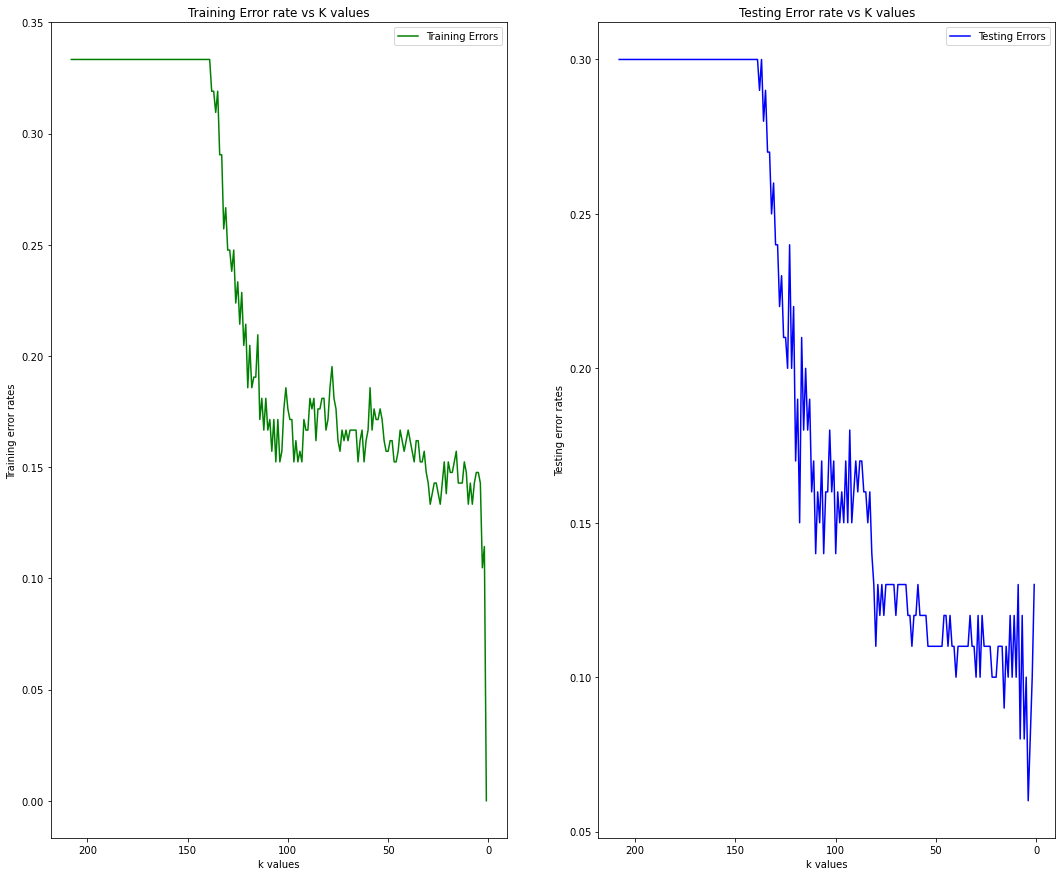

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,15))
ax1.invert_xaxis()
ax1.set_title('Training Error rate vs K values')
ax1.plot(range(208,0,-1), train_errors, color='g', linestyle='-', label='Training Errors')

ax2.invert_xaxis()
ax2.set_title('Testing Error rate vs K values')
ax2.plot(range(208,0,-1), test_errors, color='b', linestyle='-', label='Testing Errors')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax1.set(xlabel='k values', ylabel='Training error rates')
ax2.set(xlabel='k values', ylabel='Testing error rates')

# plt.title('Error Rate vs. K Value')
# ax1.xlabel('K Values')
# ax1.ylabel('Training error rate')
# ax2.xlabel('K Values')
# ax2.ylabel('Testing error rate')

# 
KNN for k = k* 

Here k* = 4 and finding calculating the confusion matrix, true positive rate, true negative rate, precision, and F1-score

https://ai.plainenglish.io/how-to-find-best-fit-k-value-in-knn-4f8a31ba64f2


https://stackoverflow.com/questions/67333158/is-there-a-way-to-draw-confusion-matrix-with-known-true-positive-true-negative

In [14]:
clfr = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')
clfr.fit(X_train, y_train)
y_test_pred = clfr.predict(X_test)
test_score = accuracy_score(y_test_pred, y_test)

In [15]:
confusion_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1_score = f1_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_mat[0][0], confusion_mat[0][1], confusion_mat[1][0], confusion_mat[1][1]
tp_rate = tp / (tp + fn)
tn_rate = tn / (tn + fp)

print('confusion matrix score: ', confusion_mat)
print('precision: %f' % precision)
print('F-1 score: %f' % f1_score)
print('True Positive rate: %f' % tp_rate)
print('True Negative rate: %f' % tn_rate)

confusion matrix score:  [[25  5]
 [ 1 69]]
precision: 0.932432
F-1 score: 0.958333
True Positive rate: 0.985714
True Negative rate: 0.833333


              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



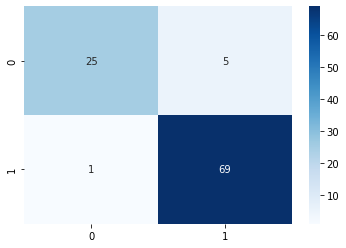

In [16]:
print(classification_report(y_test,y_test_pred))
#seaborn.heatmap(confusion_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
seaborn.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.show()

# (c). iii. Plotting the Learning Curve

Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1

Same knn logic, just adding for loops to filter the training data and test data by instructions\

https://www.geeksforgeeks.org/python-string-format-method/

In [17]:
best_test_error = []

for n in range(10,211,10):
    class_0 = math.floor(n/3)
    class_1 = n - math.floor(n/3)
    train_frame = [data[data["label"] == 0].iloc[0:class_0, :],data[data["label"] == 1].iloc[0:class_1, :]]
    train = pd.concat(train_frame, ignore_index = True)
    
    X_train = train.drop('label',axis = 1)
    y_train = train['label']
    #print(X_train)
    test_error = []
    k_list = [k for k in range(1,n,5)]
    
    for k in range(1, n, 5):
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        knn.fit(X_train, y_train)
        y_test_pred = knn.predict(X_test)
        test_score = accuracy_score(y_test_pred, y_test)
        #test_acc.append(test_score) 
        test_error.append(1-test_score)
    
    #print(test_error)    
    best_test_error.append(min(test_error))
    best_k = k_list[test_error.index(min(test_error))]
    print("N size of training set = {}, best k value = {}, min test error = {}, ".format(n, best_k, min(test_error)))
 
    #print(best_k)
    #print(best_test_error)
# len(best_test_error)
# print(best_test_error)

N size of training set = 10, best k value = 1, min test error = 0.25, 
N size of training set = 20, best k value = 6, min test error = 0.19999999999999996, 
N size of training set = 30, best k value = 1, min test error = 0.21999999999999997, 
N size of training set = 40, best k value = 11, min test error = 0.25, 
N size of training set = 50, best k value = 26, min test error = 0.30000000000000004, 
N size of training set = 60, best k value = 21, min test error = 0.29000000000000004, 
N size of training set = 70, best k value = 26, min test error = 0.29000000000000004, 
N size of training set = 80, best k value = 31, min test error = 0.29000000000000004, 
N size of training set = 90, best k value = 41, min test error = 0.29000000000000004, 
N size of training set = 100, best k value = 6, min test error = 0.25, 
N size of training set = 110, best k value = 6, min test error = 0.21999999999999997, 
N size of training set = 120, best k value = 16, min test error = 0.17000000000000004, 
N s

### Plotting the learning curve

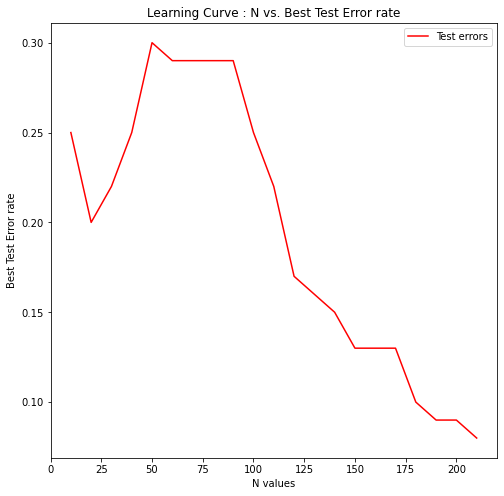

In [18]:
plt.figure(figsize=(8, 8))
plt.plot(range(10,211,10), best_test_error, color='r', label='Test errors')
plt.title("Learning Curve : N vs. Best Test Error rate")
plt.xlabel("N values")
plt.ylabel("Best Test Error rate")
plt.legend()

# 1. (d) Replace the Euclidean metric. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

i. Minkowski Distance

A. which becomes Manhattan Distance with p = 1.

In [19]:
test_errors = []
k_list = [i for i in range(1,197,5)]
for k in k_list:
    clfr = KNeighborsClassifier(n_neighbors = k, metric='minkowski', p = 1)
    clfr.fit(X_train, y_train)
    y_test_pred = clfr.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_errors.append(1-test_score)

In [20]:
#printing k* for the min test errors
k_list[test_errors.index(min(test_errors))]

6

In [21]:
#test_score_df = pd.DataFrame(k_list, test_errors )

test_score_df = pd.DataFrame(list(zip(k_list, test_errors)), columns =['k_value', 'test_error'])
test_score_df

,k_value,test_error
0,1,0.12
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.12
5,26,0.11
6,31,0.12
7,36,0.13
8,41,0.13
9,46,0.13


# 1. (d) i.
B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

Cannot use for loop with float numbers, therefore using alternative numpy arange function

https://www.guru99.com/python-range-function.html

https://stackoverflow.com/questions/30323439/raising-elements-of-a-list-to-a-power

In [22]:
log_p_list = np.arange(0.1,1.1,0.1) #[10**i for i in range(0.1, 1.1, 0.1)]
#p_list = list(map(lambda x:pow(10,x), log_p_list))
p_list = 10**log_p_list
#print(p_list)
test_error_log = []
kstar = 6
for i in p_list:
    clfr = KNeighborsClassifier(n_neighbors = kstar, metric='minkowski', p = i)
    clfr.fit(X_train, y_train)
    y_test_pred = clfr.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_error_log.append(1-test_score) 


In [23]:
#test_score_df = pd.DataFrame(log_list, test_error_log )
test_score_df1 = pd.DataFrame(list(zip(log_p_list, p_list, test_error_log)), columns =['Log10(p) values', 'p values', 'test_error'])
test_score_df1

,Log10(p) values,p values,test_error
0,0.1,1.258925,0.09
1,0.2,1.584893,0.09
2,0.3,1.995262,0.08
3,0.4,2.511886,0.08
4,0.5,3.162278,0.08
5,0.6,3.981072,0.06
6,0.7,5.011872,0.07
7,0.8,6.309573,0.08
8,0.9,7.943282,0.09
9,1.0,10.000000,0.09


# 1. (d) i.
C. which becomes Chebyshev Distance with p → ∞

https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html

In [24]:
test_errors_cheb = []
k_list = [i for i in range(1,197,5)]
for k in k_list:
    clfr = KNeighborsClassifier(n_neighbors = k, metric='minkowski', p = math.inf )
    clfr.fit(X_train, y_train)
    y_test_pred = clfr.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_errors_cheb.append(1-test_score)

In [25]:
test_score_df = pd.DataFrame(list(zip(k_list, test_errors_cheb)), columns =['k_values', 'test_errors_cheb'])
test_score_df

,k_values,test_errors_cheb
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.08
4,21,0.11
5,26,0.12
6,31,0.12
7,36,0.10
8,41,0.13
9,46,0.12


In [26]:
#printing k* for the min test errors for Chebyshev
k_list[test_errors_cheb.index(min(test_errors_cheb))]

16

# 1. (d) ii. Mahalanobis Distance

https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html

https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics

https://www.geeksforgeeks.org/how-to-inverse-a-matrix-using-numpy/

defining metric params : 
https://stackoverflow.com/questions/59862791/knn-mahalanobis-error-size-of-v-does-not-match-python

In [27]:
test_errors_maha = []
k_list = [i for i in range(1,197,5)]
for k in k_list:
    #print(np.cov(X_train))
    clfr = KNeighborsClassifier(n_neighbors = k, metric='mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(X_train, rowvar=False))} )
    clfr.fit(X_train, y_train)
    y_test_pred = clfr.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_errors_maha.append(1-test_score)

In [28]:
test_score_maha = pd.DataFrame(list(zip(k_list, test_errors_maha)), columns =['k_value', 'test_errors_mahalobis'])
test_score_maha

,k_value,test_errors_mahalobis
0,1,0.17
1,6,0.17
2,11,0.20
3,16,0.20
4,21,0.21
5,26,0.20
6,31,0.23
7,36,0.21
8,41,0.24
9,46,0.24


In [29]:
#printing k* for the min test errors for Mahalanobis
#k_list[test_errors_maha.index(min(test_errors_maha))]

# 1. (e) Weighted Euclidean distances

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [30]:
test_errors_weighted_euc = []
k_list = [i for i in range(1,197,5)]
for k in k_list:
    clfr = KNeighborsClassifier(n_neighbors = k, metric='euclidean', weights = 'distance')
    clfr.fit(X_train, y_train)
    y_test_pred = clfr.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_errors_weighted_euc.append(1-test_score)

In [31]:
test_score_weighted_euc = pd.DataFrame(list(zip(k_list, test_errors_weighted_euc)), columns =['k_value', 'test errors weighted euclidean'])
test_score_weighted_euc

,k_value,test errors weighted euclidean
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.11
4,21,0.11
5,26,0.11
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.11


# 1. (e) Weighted Manhattan distances

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [32]:
test_errors_weighted_manhatt = []
k_list = [i for i in range(1,197,5)]
for k in k_list:
    clfr = KNeighborsClassifier(n_neighbors = k, metric='minkowski', p =1, weights = 'distance')
    clfr.fit(X_train, y_train)
    y_test_pred = clfr.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_errors_weighted_manhatt.append(1-test_score)

In [33]:
test_score_weighted_manhatt = pd.DataFrame(list(zip(k_list, test_errors_weighted_manhatt)), columns =['k_value', 'test errors weighted manhattan'])
test_score_weighted_manhatt

,k_value,test errors weighted manhattan
0,1,0.12
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.11
5,26,0.10
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.11


# 1. (e) Weighted Chebyshev distances

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [34]:
test_errors_weighted_chebys = []
k_list = [i for i in range(1,197,5)]
for k in k_list:
    clfr = KNeighborsClassifier(n_neighbors = k, metric='chebyshev', weights = 'distance')
    clfr.fit(X_train, y_train)
    y_test_pred = clfr.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_errors_weighted_chebys.append(1-test_score)

In [35]:
test_score_weighted_chebys = pd.DataFrame(list(zip(k_list, test_errors_weighted_chebys)), columns =['k_value', 'test errors weighted chebyshev'])
test_score_weighted_chebys

,k_value,test errors weighted chebyshev
0,1,0.13
1,6,0.13
2,11,0.12
3,16,0.11
4,21,0.12
5,26,0.12
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.12


# 1. (e) Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

In [36]:
dta = {'Distance metrics': ['Euclidean', 'Manhattan', 'Chebyshev'],
       'Best Test error': [min(test_errors_weighted_euc), min(test_errors_weighted_manhatt), min(test_errors_weighted_chebys)],
       'Corresponding k value': [k_list[test_errors_weighted_euc.index(min(test_errors_weighted_euc))],
                                 k_list[test_errors_weighted_manhatt.index(min(test_errors_weighted_manhatt))], 
                                 k_list[test_errors_weighted_chebys.index(min(test_errors_weighted_chebys))]]
        }

k_list[test_errors.index(min(test_errors))]
# Create DataFrame
df = pd.DataFrame(dta)
df

,Distance metrics,Best Test error,Corresponding k value
0,Euclidean,0.10,6
1,Manhattan,0.10,26
2,Chebyshev,0.11,16


# 1. (f) What is the lowest training error rate you achieved in this homework?

ANS : The lowest training error rate is 0. Obtained when k = 1